In [16]:
path = r"C:\Users\madua\Documents\Mestrado\Deep Learning\Projeto Final\output_txt_with_ann\splits_jaad"

In [17]:
import os

# Caminho da pasta com os arquivos TXT
folder_path = path

# Arquivos a serem unificados
file_groups = {
    "jaad_test_final": ["jaad_test_scenes_normal", "jaad_test_scenes_augmented"],
    "jaad_val_final": ["jaad_val_scenes_normal", "jaad_val_scenes_augmented"],
    "jaad_train_final": ["jaad_train_scenes_normal", "jaad_train_scenes_augmented"]
}

# Processar cada grupo
for output_file, input_files in file_groups.items():
    output_path = os.path.join(folder_path, output_file + ".txt")
    
    with open(output_path, "w") as outfile:
        for input_file in input_files:
            input_path = os.path.join(folder_path, input_file + ".txt")
            
            # Verifica se o arquivo de entrada existe antes de tentar abrir
            if not os.path.exists(input_path):
                print(f"Aviso: {input_file}.txt não encontrado, pulando...")
                continue
            
            with open(input_path, "r") as infile:
                # Escreve o conteúdo do arquivo de entrada no arquivo de saída
                outfile.write(infile.read())
                # Adiciona uma nova linha para separar os conteúdos (opcional)
                outfile.write("\n")
    
    print(f"Unificado: {output_file}.txt")

print("Processo de unificação concluído!")


Unificado: jaad_test_final.txt
Unificado: jaad_val_final.txt
Unificado: jaad_train_final.txt
Processo de unificação concluído!


pip install pillow matplotlib torchvision


In [4]:
pip install pillow matplotlib torchvision


  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/c3/18/00993d420b1d6e88582e51d4bc82c824c99a2e9c045d50eaf9b34fff729a/torchvision-0.20.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for torch==2.5.1 from https://files.pythonhosted.org/packages/5f/ba/607d013b55b9fd805db2a5c2662ec7551f1910b4eef39653eeaba182c5b2/torch-2.5.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for sympy==1.13.1 from https://files.pythonhosted.org/packages/b2/fe/81695a1aa331a842b582453b605175f419fe8540355886031328089d840a/sympy-1.13.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.6 MB 4.1 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.6 MB 3.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.6 MB 3.8 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.6 MB 3.5 MB/s eta 0:0


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


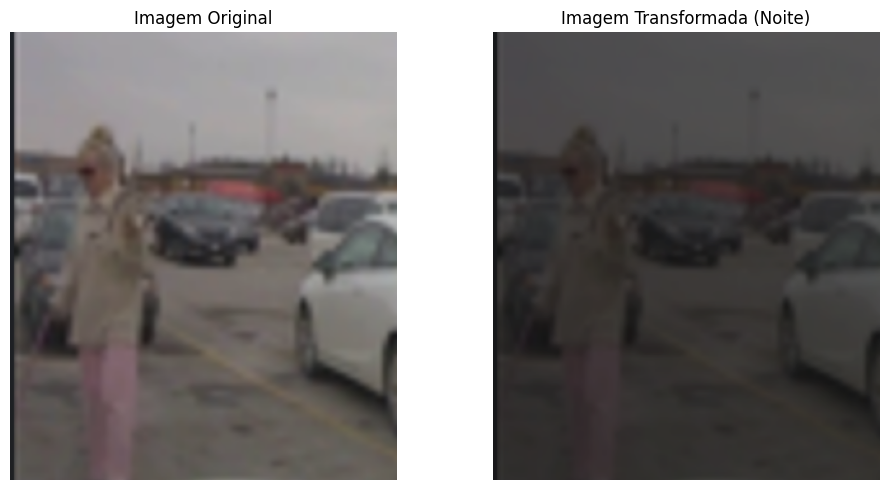

In [12]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Carregar uma imagem de exemplo
image_path = r"C:\Users\madua\Documents\Mestrado\Deep Learning\Projeto Final\looking-main\images\teste_img.png"  # Substitua pelo caminho da sua imagem
image = Image.open(image_path)

# Configurar o ColorJitter para simular escuridão (noite)
transform = transforms.ColorJitter(brightness=(0.5, 0.6), contrast=(0.7, 0.8))


# Aplicar a transformação
transformed_image = transform(image)

# Mostrar a imagem original e a transformada lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title("Imagem Original")
axes[0].axis("off")

axes[1].imshow(transformed_image)
axes[1].set_title("Imagem Transformada (Noite)")
axes[1].axis("off")

plt.tight_layout()
plt.show()


In [1]:
path_gt_augmented = r"C:\Users\madua\Documents\Mestrado\Deep Learning\Projeto Final\output_txt_test\ground_truth_teste.txt"
path_gt_normal = r"C:\Users\madua\Documents\Mestrado\Deep Learning\Projeto Final\output_txt_with_ann\ground_truth_teste.txt"
output_dir = r'C:\Users\madua\Documents\Mestrado\Deep Learning\Projeto Final\output_txt_with_ann\train_test_division'

In [2]:
import os
from collections import defaultdict
import random

# Carregar o arquivo TXT
file_path = path_gt_augmented
with open(file_path, "r") as file:
    lines = file.readlines()

# Identificar os vídeos únicos
videos = defaultdict(list)
for line in lines:
    parts = line.strip().split(",")
    video_name = parts[0].split("\\")[0]
    videos[video_name].append(line)

# Dividir os vídeos em treino, teste e validação
video_names = list(videos.keys())
random.shuffle(video_names)  # Misturar aleatoriamente

num_videos = len(video_names)
train_size = int(0.8 * num_videos)
test_size = int(0.1 * num_videos)

train_aug_videos = video_names[:train_size]
test_aug_videos = video_names[train_size:train_size + test_size]
val_aug_videos = video_names[train_size + test_size:]

# Criar arquivos separados
output_dir = r'C:\Users\madua\Documents\Mestrado\Deep Learning\Projeto Final\output_txt_with_ann\train_test_division'
os.makedirs(output_dir, exist_ok=True)

with open(os.path.join(output_dir, "train_division.txt"), "w") as train_file, \
     open(os.path.join(output_dir, "test_division.txt"), "w") as test_file, \
     open(os.path.join(output_dir, "val_division.txt"), "w") as val_file:

    for video in train_aug_videos:
        train_file.writelines(videos[video])
    
    for video in test_aug_videos:
        test_file.writelines(videos[video])
    
    for video in val_aug_videos:
        val_file.writelines(videos[video])

print(f"Divisão concluída: {len(train_aug_videos)} vídeos em treino, {len(test_aug_videos)} em teste, {len(val_aug_videos)} em validação.")

#print('train_videos', train_videos)

Divisão concluída: 92 vídeos em treino, 11 em teste, 12 em validação.


In [3]:
# Identificar os vídeos únicos
file_path = path_gt_normal
with open(file_path, "r") as file:
    lines = file.readlines()

# Identificar os vídeos únicos
videos = defaultdict(list)
for line in lines:
    parts = line.strip().split(",")
    video_name = parts[0].split("\\")[0]
    videos[video_name].append(line)

video_names_normal = list(videos.keys())

video_names_normal_set = set(video_names_normal)
train_aug_set = set(train_aug_videos)
test_aug_set = set(test_aug_videos)
val_aug_set = set(val_aug_videos)

unified_set = train_aug_set.union(test_aug_set).union(val_aug_set)

# Encontrando elementos em comum
common_videos_train = list(video_names_normal_set.intersection(train_aug_set))
common_videos_test = list(video_names_normal_set.intersection(test_aug_set))
common_videos_val = list(video_names_normal_set.intersection(val_aug_set))


In [4]:
import random

def load_data(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
    return lines

# Carregar o conjunto completo
new_data = load_data(path_gt_normal)

# Número desejado de linhas
desired_size = 70000

# Amostragem aleatória de linhas
random.shuffle(new_data)  # Mistura o conjunto
reduced_data = new_data[:desired_size]

# Verificar o tamanho do novo conjunto
print(f"Tamanho do novo conjunto: {len(reduced_data)}")


Tamanho do novo conjunto: 70000


In [5]:
len(new_data)

110036

In [6]:
new_data = reduced_data

In [7]:
len(new_data)

70000

In [8]:
output_file_path = os.path.join(output_dir, "train_division.txt")
with open(output_file_path, "a") as final_file:
    for video in common_videos_train:
        for line in new_data:
            if video in line:
                final_file.write(line)
                

In [9]:
output_file_path = os.path.join(output_dir, "test_division.txt")
with open(output_file_path, "a") as final_file:
    for video in common_videos_test:
        for line in new_data:
            if video in line:
                final_file.write(line)

In [10]:
output_file_path = os.path.join(output_dir, "val_division.txt")
with open(output_file_path, "a") as final_file:
    for video in common_videos_val:
        for line in new_data:
            if video in line:
                final_file.write(line)

In [11]:
# Print dos conjuntos atualizados
print(f"Treino atualizado: {train_aug_set}")
print(f"Teste atualizado: {test_aug_set}")
print(f"Validação atualizada: {val_aug_set}")
print(f"Treino atualizado: {len(train_aug_set)}")
print(f"Teste atualizado: {len(test_aug_set)}")
print(f"Validação atualizada: {len(val_aug_set)}")

Treino atualizado: {'video_0163', 'video_0226', 'video_0066', 'video_0326', 'video_0231', 'video_0331', 'video_0291', 'video_0155', 'video_0318', 'video_0324', 'video_0227', 'video_0079', 'video_0300', 'video_0213', 'video_0303', 'video_0002', 'video_0332', 'video_0072', 'video_0209', 'video_0313', 'video_0145', 'video_0198', 'video_0001', 'video_0188', 'video_0218', 'video_0101', 'video_0089', 'video_0122', 'video_0341', 'video_0149', 'video_0335', 'video_0135', 'video_0223', 'video_0205', 'video_0345', 'video_0154', 'video_0287', 'video_0194', 'video_0009', 'video_0232', 'video_0305', 'video_0164', 'video_0183', 'video_0123', 'video_0311', 'video_0277', 'video_0165', 'video_0243', 'video_0268', 'video_0189', 'video_0250', 'video_0180', 'video_0322', 'video_0221', 'video_0224', 'video_0295', 'video_0152', 'video_0225', 'video_0060', 'video_0088', 'video_0076', 'video_0111', 'video_0301', 'video_0132', 'video_0298', 'video_0175', 'video_0307', 'video_0093', 'video_0159', 'video_0102', 

In [12]:
new_videos = video_names_normal_set - unified_set 

# Divisão em treino, teste e validação dos novos vídeos
new_videos_list = list(new_videos)
num_new_videos = len(new_videos_list)

train_size_new = int(0.8 * num_new_videos)
test_size_new = int(0.1 * num_new_videos)

train_new = new_videos_list[:train_size_new]
train_new = list(train_new)
test_new = new_videos_list[train_size_new:train_size_new + test_size_new]
test_new = list(test_new)
val_new = new_videos_list[train_size_new + test_size_new:]
val_new = list(val_new)


# Atualizar os conjuntos finais
train_tot = train_aug_set.union(train_new)
test_tot = test_aug_set.union(test_new)
val_tot = val_aug_set.union(val_new)

# Print dos conjuntos atualizados
print(f"Treino atualizado: {len(train_tot)}")
print(f"Teste atualizado: {len(test_tot)}")
print(f"Validação atualizada: {len(val_tot)}")

Treino atualizado: 256
Teste atualizado: 31
Validação atualizada: 33


In [13]:
output_file_path = os.path.join(output_dir, "train_division.txt")
with open(output_file_path, "a") as final_file:
    for video in train_new:
        for line in new_data:
            if video in line:
                final_file.write(line)

In [14]:
output_file_path = os.path.join(output_dir, "test_division.txt")
with open(output_file_path, "a") as final_file:
    for video in test_new:
        for line in new_data:
            if video in line:
                final_file.write(line)

In [15]:
output_file_path = os.path.join(output_dir, "val_division.txt")
with open(output_file_path, "a") as final_file:
    for video in val_new:
        for line in new_data:
            if video in line:
                final_file.write(line)

In [16]:
test = load_data(r'C:\Users\madua\Documents\Mestrado\Deep Learning\Projeto Final\output_txt_with_ann\train_test_division\test_division.txt')
train = load_data(r'C:\Users\madua\Documents\Mestrado\Deep Learning\Projeto Final\output_txt_with_ann\train_test_division\train_division.txt')
val = load_data(r'C:\Users\madua\Documents\Mestrado\Deep Learning\Projeto Final\output_txt_with_ann\train_test_division\val_division.txt')

In [17]:
len(test)

6937

In [18]:
len(train)

55818

In [19]:
len(val)

7801

In [20]:
soma = len(test) + len(train) + len(val)
soma

70556

### agora, vamos excluir os augmenteds


In [22]:
def load_data(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
    return lines

# Carga dos arquivos
train_lines = load_data(r'C:\Users\madua\Documents\Mestrado\Deep Learning\Projeto Final\output_txt_with_ann\train_test_division\train_division.txt')
test_lines = load_data(r'C:\Users\madua\Documents\Mestrado\Deep Learning\Projeto Final\output_txt_with_ann\train_test_division\test_division.txt')
val_lines = load_data(r'C:\Users\madua\Documents\Mestrado\Deep Learning\Projeto Final\output_txt_with_ann\train_test_division\val_division.txt')

# Filtragem de linhas que não contêm "augmented"
train_normal = [line for line in train_lines if 'augmented' not in line]
test_normal = [line for line in test_lines if 'augmented' not in line]
val_normal = [line for line in val_lines if 'augmented' not in line]

# Salvar os novos arquivos
output_train_path = r'C:\Users\madua\Documents\Mestrado\Deep Learning\Projeto Final\output_txt_with_ann\train_test_division\train_normal.txt'
output_test_path = r'C:\Users\madua\Documents\Mestrado\Deep Learning\Projeto Final\output_txt_with_ann\train_test_division\test_normal.txt'
output_val_path = r'C:\Users\madua\Documents\Mestrado\Deep Learning\Projeto Final\output_txt_with_ann\train_test_division\val_normal.txt'

with open(output_train_path, "w") as train_file, \
     open(output_test_path, "w") as test_file, \
     open(output_val_path, "w") as val_file:
    train_file.writelines(train_normal)
    test_file.writelines(test_normal)
    val_file.writelines(val_normal)

print("Arquivos 'train_normal.txt', 'test_normal.txt' e 'val_normal.txt' criados com sucesso.")


Arquivos 'train_normal.txt', 'test_normal.txt' e 'val_normal.txt' criados com sucesso.
